<a href="https://colab.research.google.com/github/m-antonio22069/Aluguel/blob/master/Aluguel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas 

In [0]:
!pip install category_encoders

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import  Pipeline

In [0]:
df = pd.read_csv('sample_data/houses_to_rent_v2.csv')

In [115]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [149]:
# Verificando a existencia de dados nulos no dataset

df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

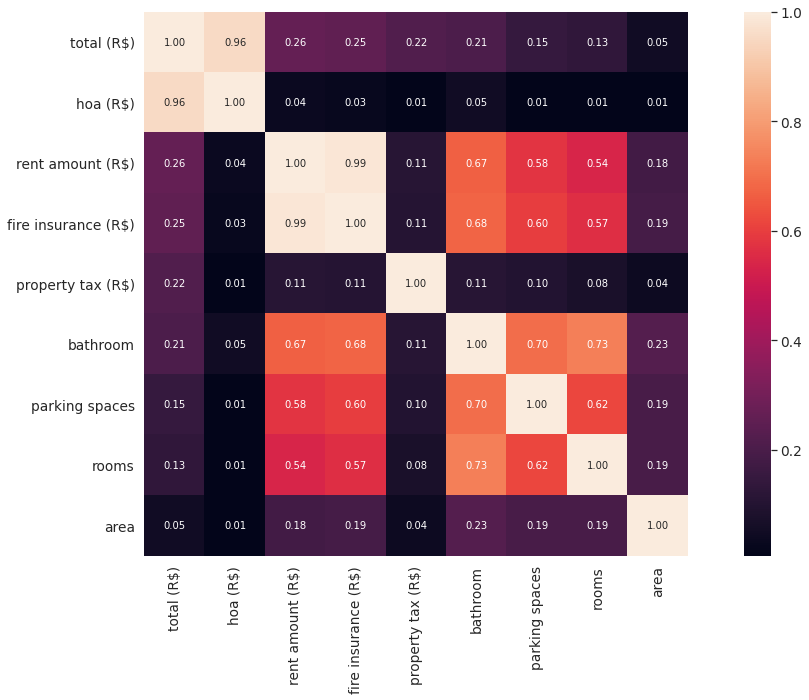

In [117]:
'''
Vamos Extrair uma matriz correlação para ter uma melhor visualização dos dados
A ideia é tomar as maiores correlações. Como este dataset tem apenas 13 Features
vamos extrair as 10 melhores correlações
'''

k= 10 # Número de valores para selecionar

plt.figure(figsize=(20,10)); # Selecionando o tamanho da figura/grafico

corrmat = df.corr() # Montando a matriz correlação

# Plotando as 10 melhores correlações
cols = corrmat.nlargest(n=k,columns= 'total (R$)')['total (R$)'].index

# Matriz do coeficiente de correlação das variáveis.
matriz_correlacao = np.corrcoef(df[cols].values.T)


# Montando grafico
sns.set(font_scale=1.25)

hm = sns.heatmap(data = matriz_correlacao, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

Podemos observar como o hoa (taxa de condominio) tem uma forte correlação com o preço total, dessa forma, vamos explora-lo.



### Mostrando uma visão geral das correlações

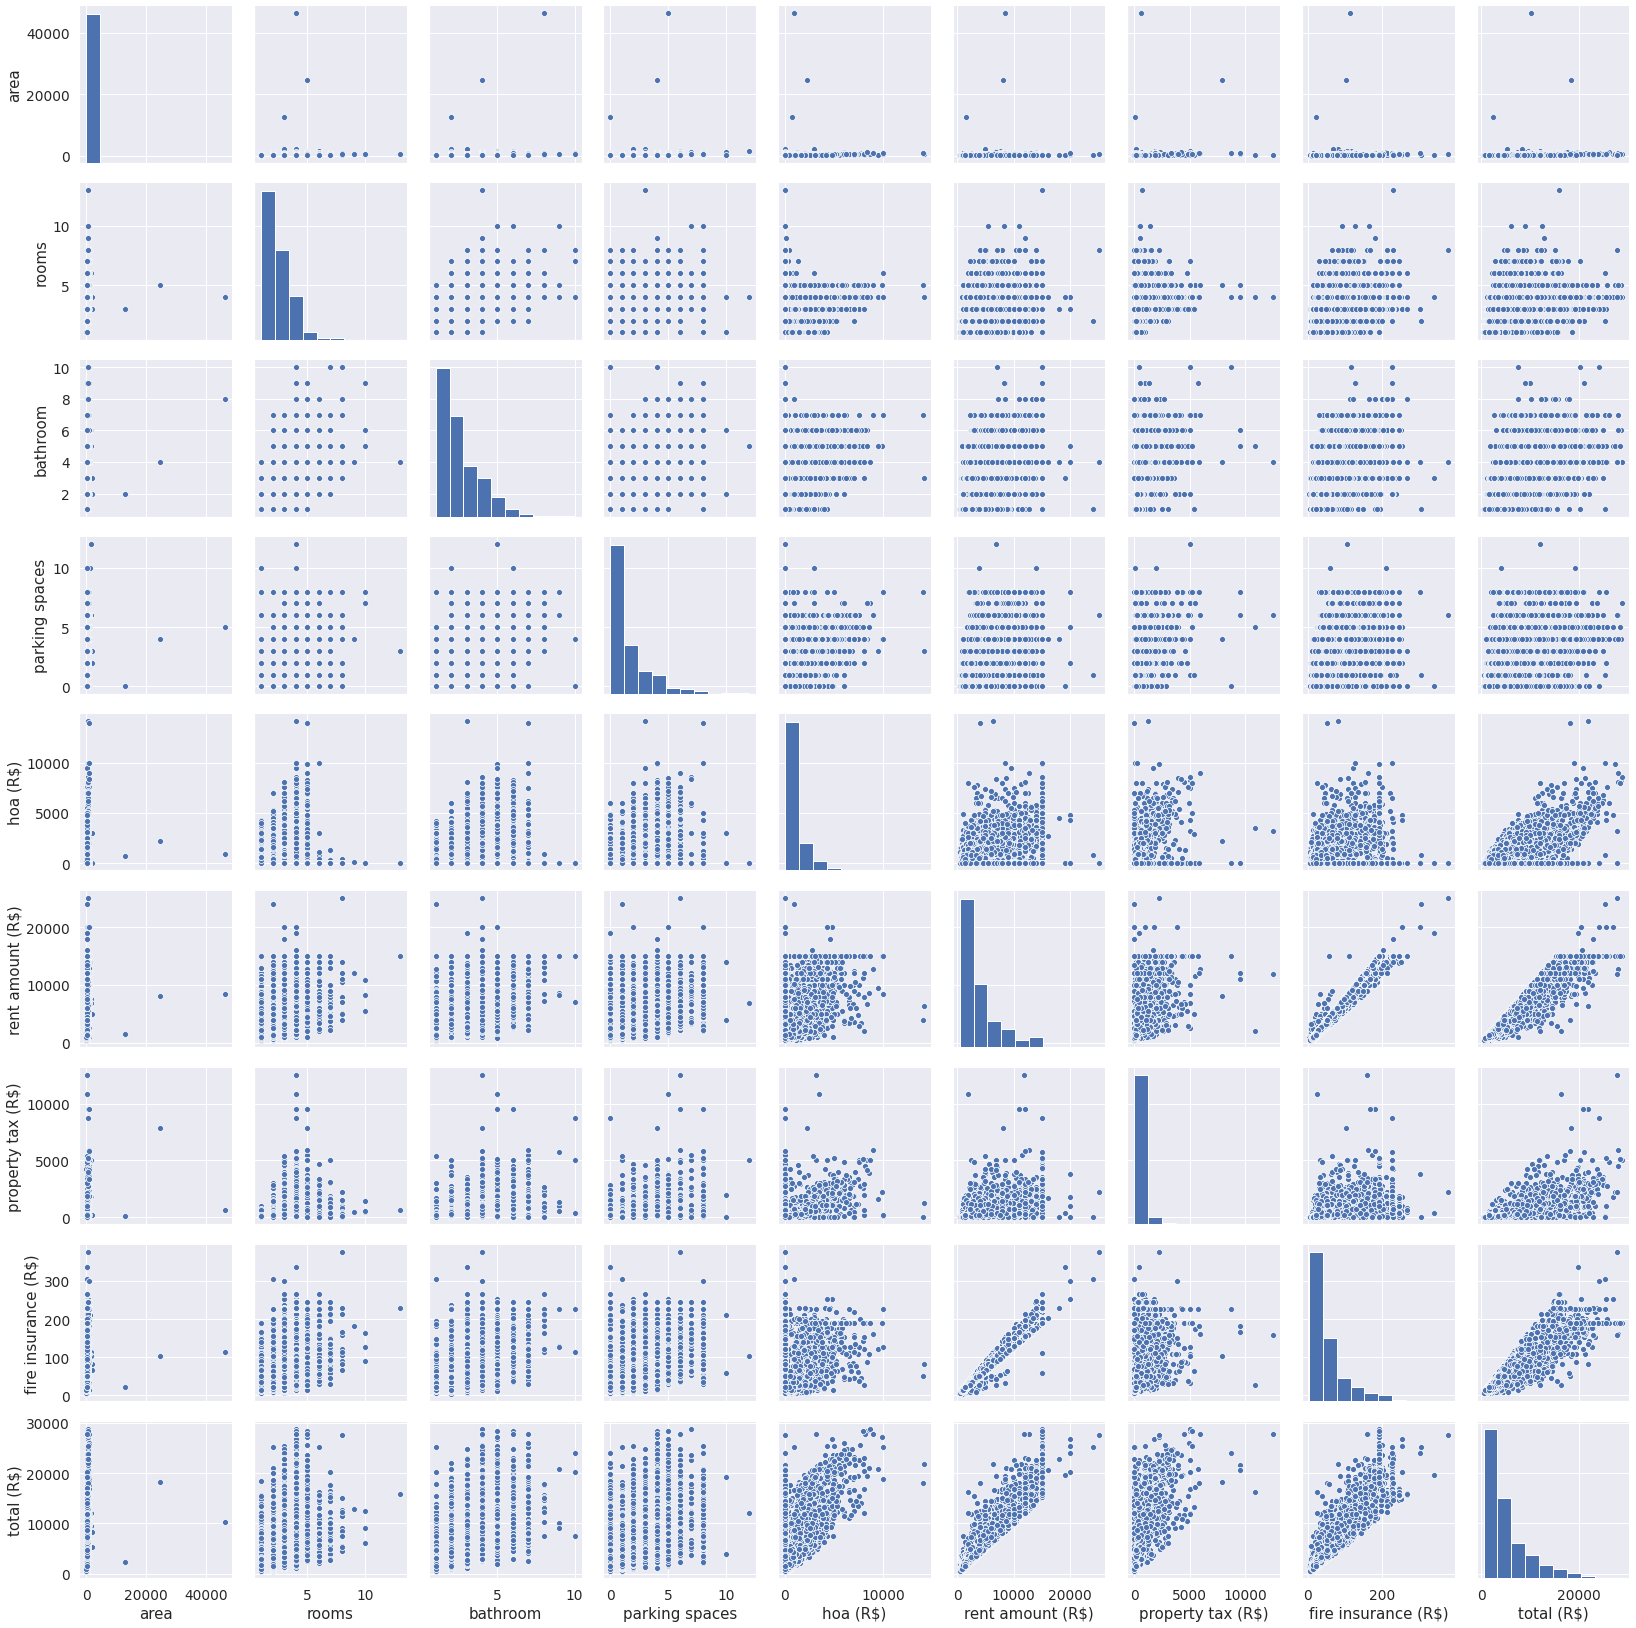

In [130]:
sns.pairplot(data=df)

### Vamos verificar a distribuição de preços 


 mu = 5183.24 and sigma = 4430.04



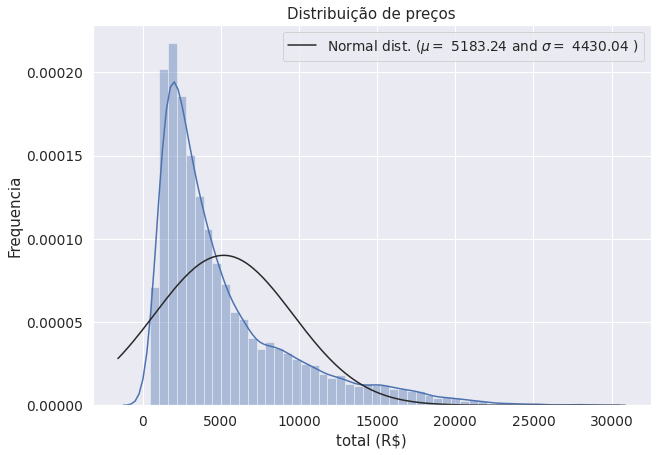

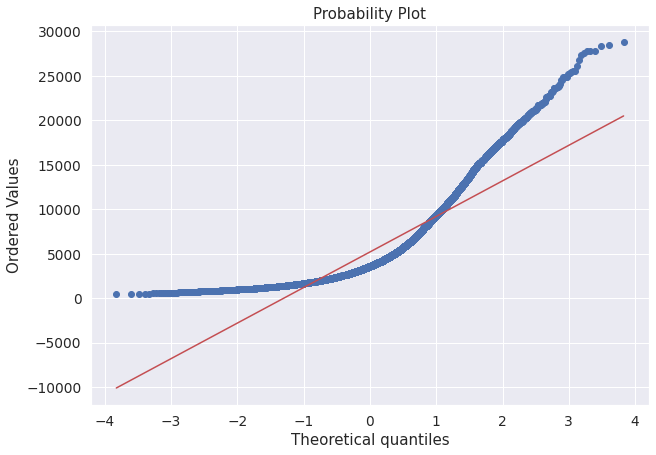

In [129]:
fig, ax = plt.subplots(figsize=(10,7))

# target variable - preço de venda
sns.distplot((df['total (R$)']), fit=norm, ax=ax);

# Obtendo os parametros necessarios para a função
(mu, sigma) = norm.fit((df['total (R$)']))
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotando a distribuição

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequencia')
plt.title('Distribuição de preços')

# plotando tambem o QQ-plot
fig = plt.figure(figsize=(10,7))
res = stats.probplot(df['total (R$)'], plot=plt)
plt.show()

Observações:


1.   Pode-se notar como o preço esta concentrado entre 450-10.000
2. Pode-se notar que os dados não estao normalmente distribuidos. Estes apresentam-se de forma lognormal.
3. Por definição, a distribuição lognormal é caracterizada pela propriedade que os logaritmos dos valores seguem uma distribuição normal
4. O grafuco QQ eidencia que os dados não se apresentam normalmente distribuidos



### Tratando a a correlação total x hoa

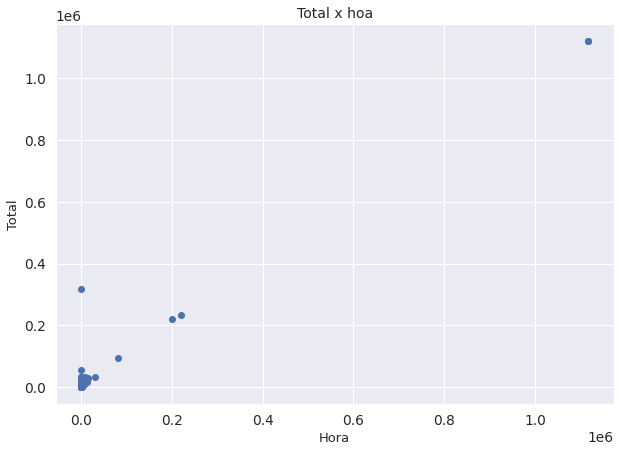

In [118]:
# Total(R$) x hoa(R$)

fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(x = df['hoa (R$)'], y=df['total (R$)'])
plt.xlabel(xlabel='Hora',fontsize=13)
plt.ylabel(ylabel='Total',fontsize=13)
plt.title(label="Total x hoa", fontsize=14)
plt.show()

In [0]:
# Removendo outliers

df = df.drop(labels=df[ (df['hoa (R$)']>0.4*10**6) & (df['total (R$)']>0.8*10**6)].index)

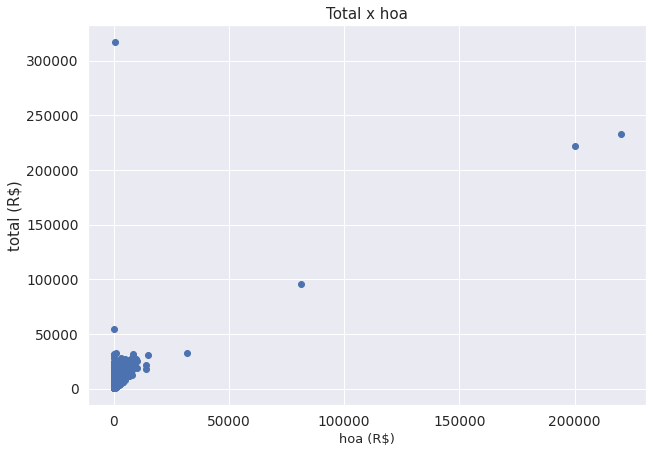

In [120]:
# Total(R$) x hoa

fig, ax =plt.subplots(figsize=(10,7))
ax.scatter(x=df['hoa (R$)'],y=df['total (R$)'])
plt.xlabel(xlabel='hoa (R$)', fontsize=13)
plt.ylabel(ylabel='total (R$)')
plt.title(label="Total x hoa")
plt.show()

In [0]:
df = df.drop(labels=df[( df['hoa (R$)']>100000 ) & ( df['total (R$)']> 200000 )].index)

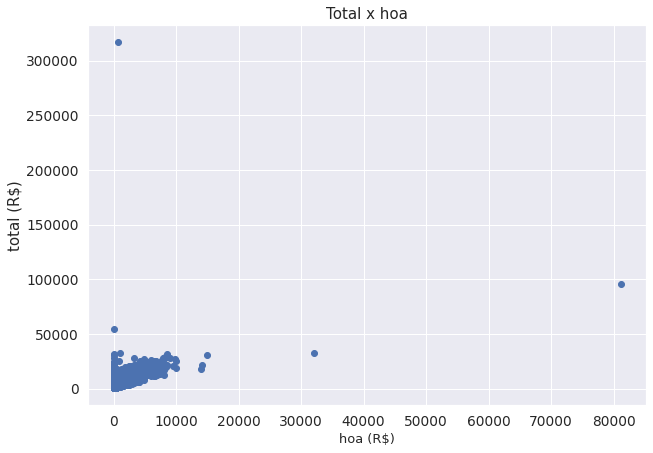

In [122]:
# Total(R$) x hoa

fig, ax =plt.subplots(figsize=(10,7))
ax.scatter(x=df['hoa (R$)'],y=df['total (R$)'])
plt.xlabel(xlabel='hoa (R$)', fontsize=13)
plt.ylabel(ylabel='total (R$)')
plt.title(label="Total x hoa")
plt.show()

In [0]:
df = df.drop(labels=df[( df['hoa (R$)']>40000 ) & ( df['total (R$)']> 100000 )].index)

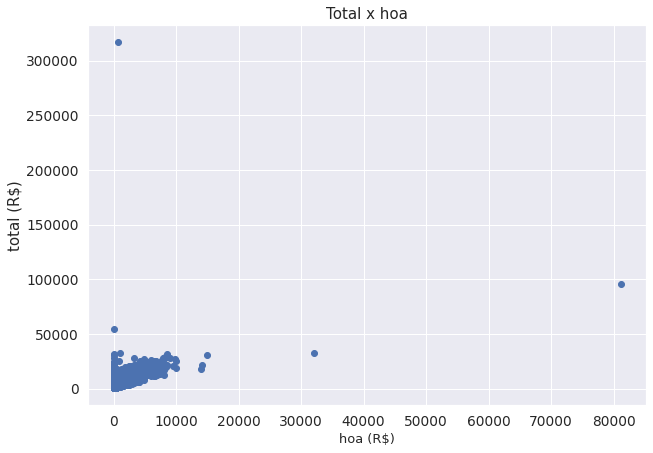

In [124]:
# Total(R$) x hoa

fig, ax =plt.subplots(figsize=(10,7))
ax.scatter(x=df['hoa (R$)'],y=df['total (R$)'])
plt.xlabel(xlabel='hoa (R$)', fontsize=13)
plt.ylabel(ylabel='total (R$)')
plt.title(label="Total x hoa")
plt.show()

In [0]:
df = df.drop(labels=df[( df['hoa (R$)']>40000 ) & ( df['total (R$)']> 80000 )].index)

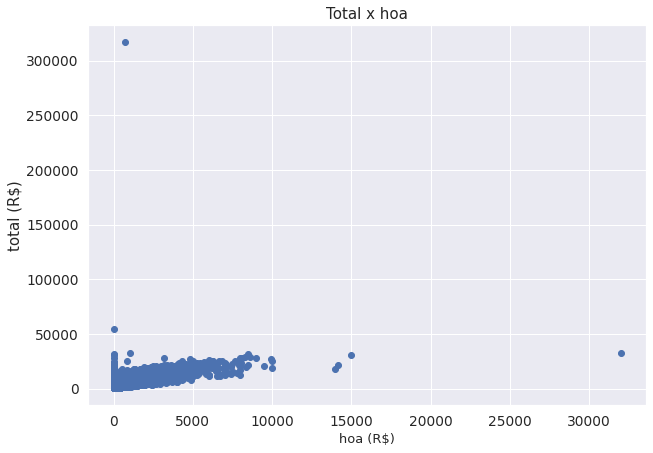

In [126]:
# Total(R$) x hoa

fig, ax =plt.subplots(figsize=(10,7))
ax.scatter(x=df['hoa (R$)'],y=df['total (R$)'])
plt.xlabel(xlabel='hoa (R$)', fontsize=13)
plt.ylabel(ylabel='total (R$)')
plt.title(label="Total x hoa")
plt.show()

In [0]:
df = df.drop(labels=df[( df['hoa (R$)']>300000 )].index)
df = df.drop(labels=df[( df['total (R$)']> 30000 )].index)

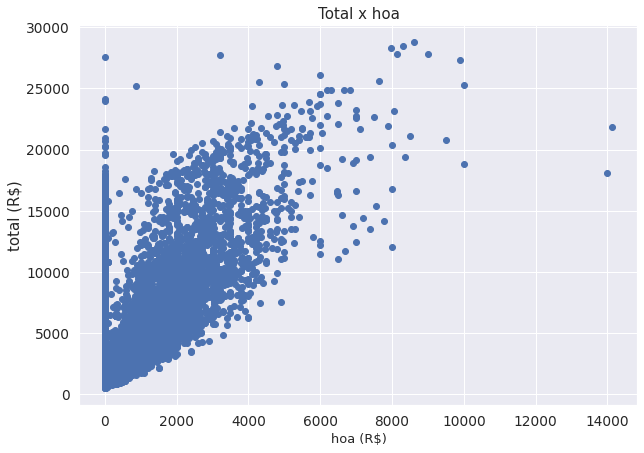

In [128]:
# Total(R$) x hoa

fig, ax =plt.subplots(figsize=(10,7))
ax.scatter(x=df['hoa (R$)'],y=df['total (R$)'])
plt.xlabel(xlabel='hoa (R$)', fontsize=13)
plt.ylabel(ylabel='total (R$)')
plt.title(label="Total x hoa")
plt.show()

### Vamos observar como os comodos (quartos e banheiro) se relacionam com o total e entre eles


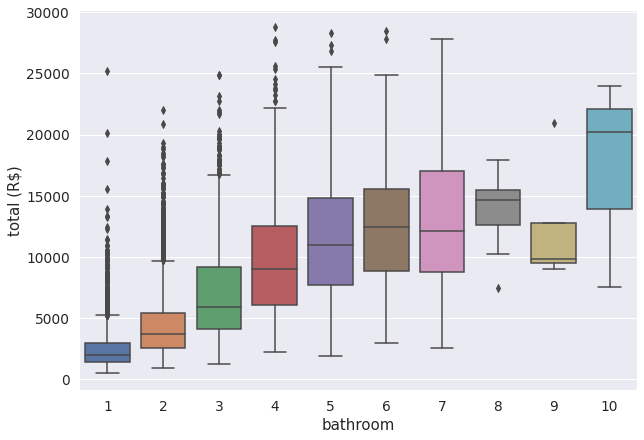

In [131]:
plt.figure(figsize=(10,7))
sns.boxplot(x='bathroom', y='total (R$)', data=df)
plt.show()

observações:
  

1.   Quanto maior a quantidade de banheiros, a tendencia do preço é aumentar
2.   É possivel verificar que apartamentos com 1-2 banheiros possuem muitos outliers, portanto, pode-se supor que isso esteja intimamente ligado a construção da residencia, seu padrão, localização e etc.




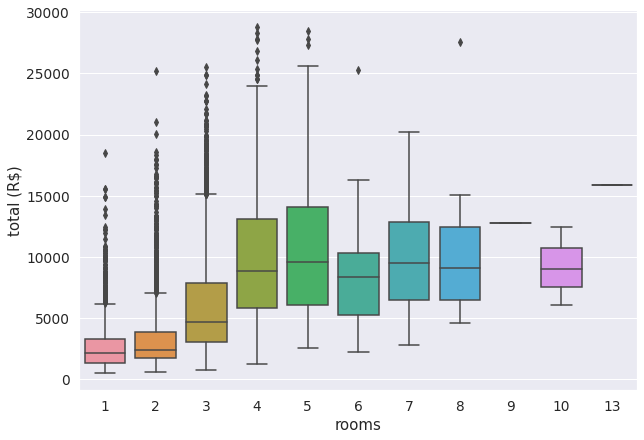

In [132]:
plt.figure(figsize=(10,7))
sns.boxplot(x='rooms', y='total (R$)', data=df)
plt.show()

Observações:


1.   Entre 1-5 quartos, a relação com o preço é crescente.
2.   Apos isso, pode-se notar como os preços se estabilizam e se concentram na regiáo dos R$10.000
3.   Residencias com 2 ou 3 quartos possuem muitos outliers, possivelmente ligados a outros fatores como localização, construção e etc 





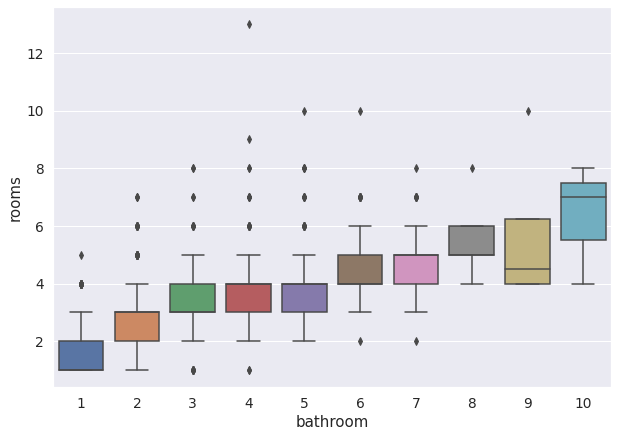

In [133]:
plt.figure(figsize=(10,7))
sns.boxplot(x='bathroom', y='rooms', data=df)
plt.show()

Observações:
1. Pode-se observar que a quantidade de quartos tem uma correlação positiva com a quantidade de banheiros

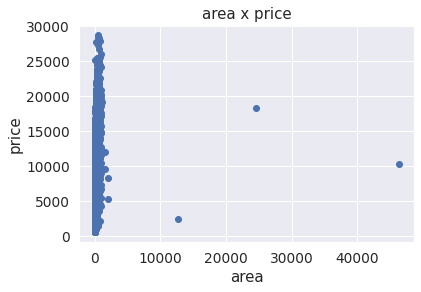

In [134]:
#casas x preço
plt.scatter(x = df['area'],y=df['total (R$)'],)
plt.title("area x price")
plt.xlabel("area")
plt.ylabel("price")
plt.show()

Observaões:
1. Pode-se notar que uma area menor implica em um preço menos, e vice versa.
2. A justificativa pode ser estabelecida verificando medidas como o preço/m² da região.


Agora vamos ver como o numero de quartos esta distribuido nas cidades e seus respectivos custos.

Text(0.5, 1.0, 'City and number of rooms')

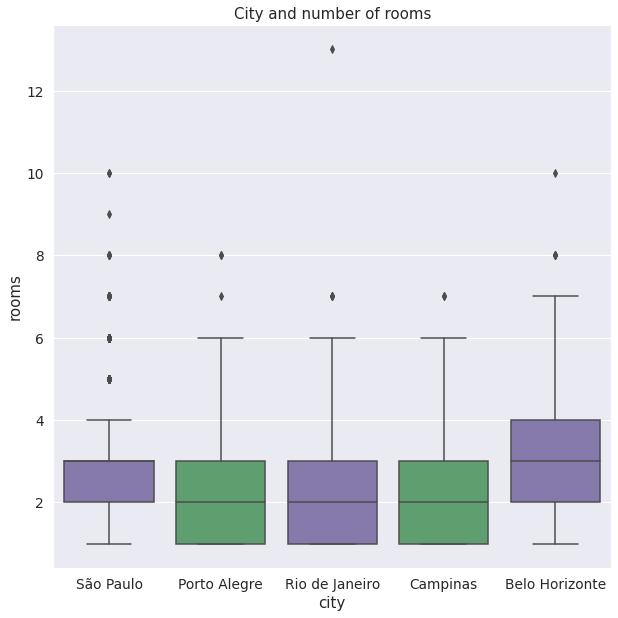

In [135]:
plt.figure(figsize=(10,10))
sns.boxplot(x="city", y= 'rooms', palette=["m", "g"], data=df)
plt.title('City and number of rooms')

Observações:
1. pode-se notar que São Paulo, Porto Alegre, Rio de Janeiro e Campinas tem cerca de 75% das residencias com no maximo 3 quartos.
2. Por outro lado, pode-se notar que Belo Horizonte tem somente 50% desses valores, portanto, cerca de metade das residencias de Belo horizonte possuem mais de 3 quartos.

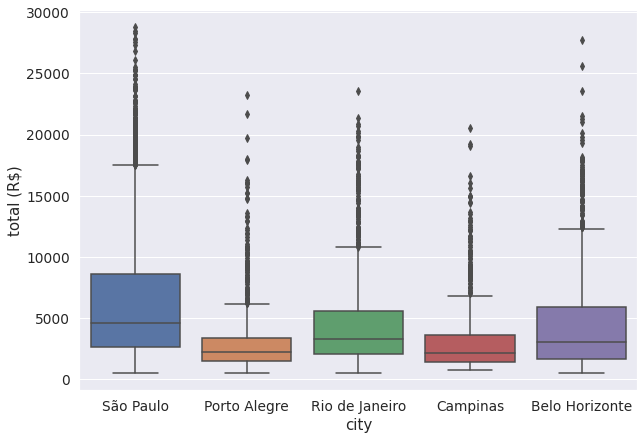

In [136]:
plt.figure(figsize=(10,7))
sns.boxplot(x= 'city',y='total (R$)',data=df)
plt.show()

Observações:
1. O valor do custo total em São Paulo apresenta maior variabilidade, seguido de Rio de Janeiro e Belo Horizonte.
2. Por outro lado, Porto Alegre e Campinas tem menor variabilidade de preço.

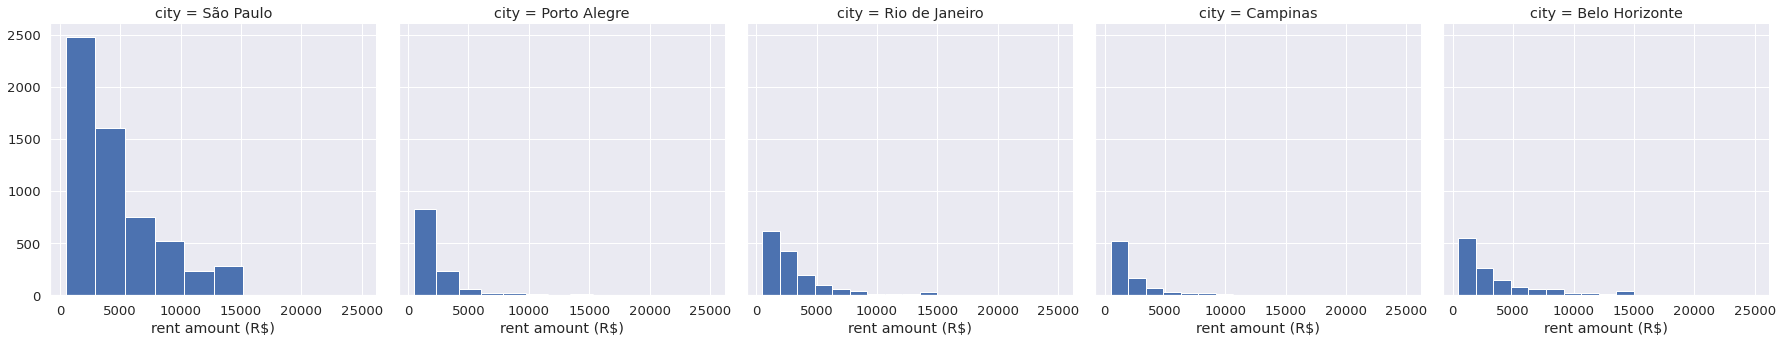

In [188]:
g = sns.FacetGrid(df, col="city", height=5)
g = g.map(plt.hist, 'rent amount (R$)')

Observações:
1. São Paulo possui a maior quantidade de imoveis para alugar.
2. A maior parte de seus imoveis custam ate R$10.000.

3. Campinas tem o a menor quantidade de imoveis para alugar e a maior parte dos seus alugueis custam ate R$3500.00

### Vamos explorar como os animais inluenciam no preço dos imoveis e como estao distribuidos

Text(0.5, 1.0, 'animals permitidos por cidade')

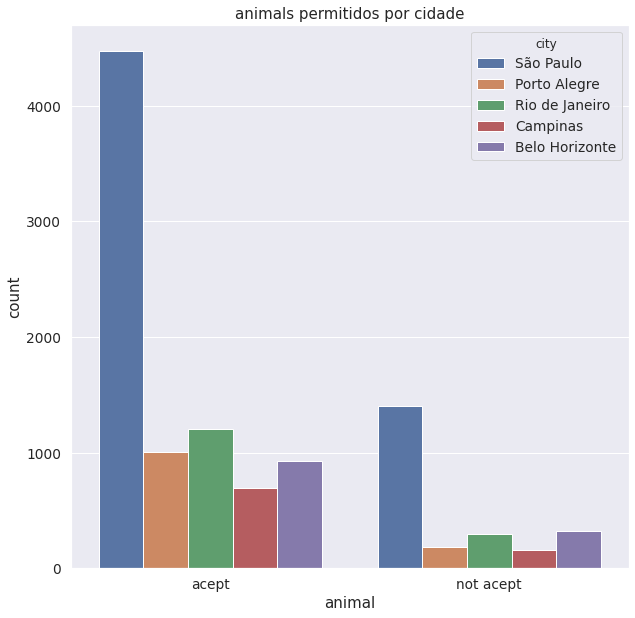

In [138]:
plt.figure(figsize=(10,10))
sns.countplot(x ='animal',hue = 'city', data=df).set_title('animals permitidos por cidade')

Observações:
1. São paulo se destaca em numeros por aceitar e não aceitar animais.
2. Pode-se notar que cerca de 77.7% dos imoveis aceitam animais

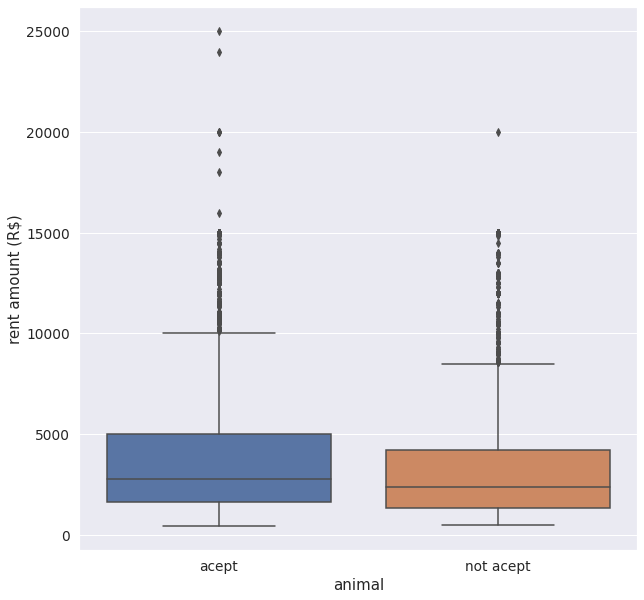

In [139]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['rent amount (R$)'],x =df['animal'])
plt.show()

Observações:
1. Pode-se notar que a aceitação de animais esta intimamente ligada ao preço do aluguel do imovel. Imoveis que aceitam animais tendem a ser mais caros.
2. Pode-se ver que os imoveis que aceitam animais tem uma maior variabilidade de preço em comparação aos que nao aceitam. 

### Vamos explorar como um imovel mobiliado pode influenciar no preço total do aluguel.

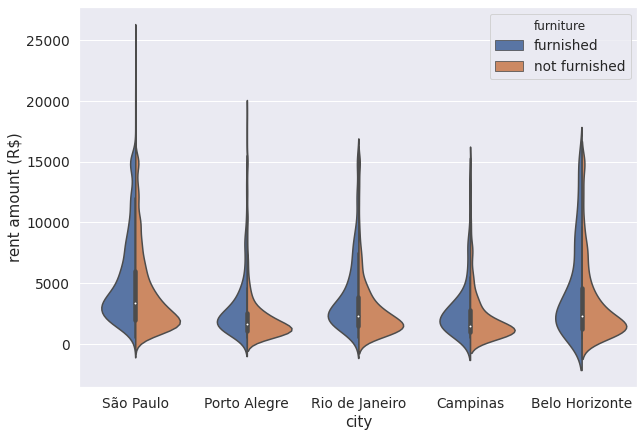

In [140]:
plt.figure(figsize=(10,7))
sns.violinplot(x ='city', y ='rent amount (R$)', data = df,hue ='furniture', split=True)

Observações:
1. A maioria dos imoveis mobilhados e não mobilhados estão concentrados na mesma região.
2. São Paulo e Belo Horizonte possuem dados mais distribuidos.

### Vamos explorar como as vagas de estacionamento podem influenciar no preço do imovel 

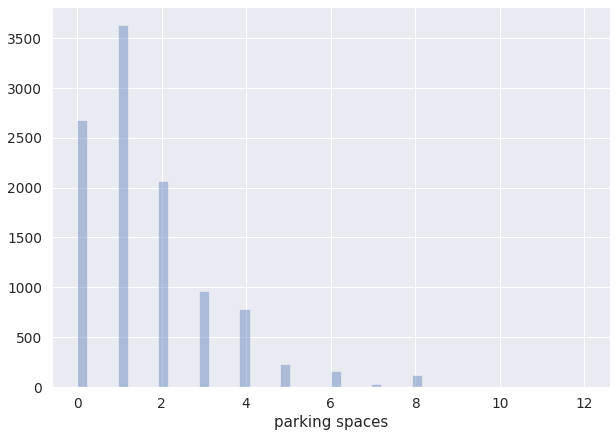

In [141]:
plt.figure(figsize=(10,7))
sns.distplot(a=df['parking spaces'],kde =False)

Text(0, 0.5, 'Quantity')

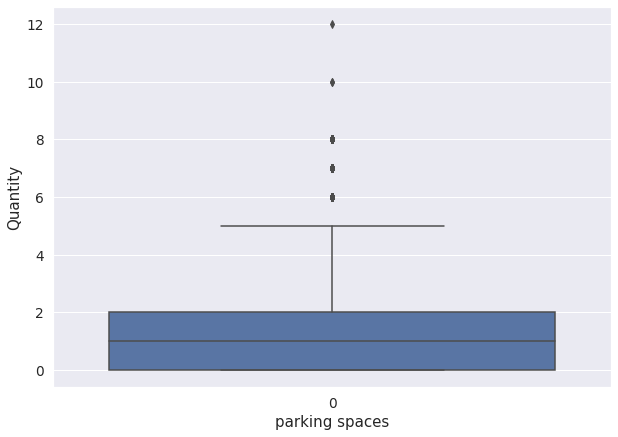

In [142]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df['parking spaces'])
plt.xlabel(xlabel='parking spaces')
plt.ylabel(ylabel='Quantity')

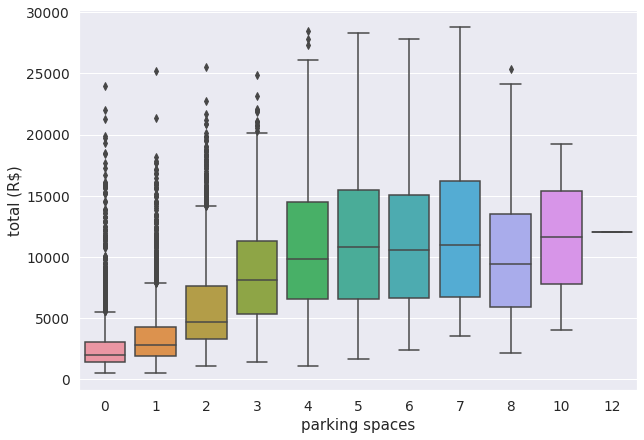

In [143]:
plt.figure(figsize=(10,7))
sns.boxplot(x= 'parking spaces',y='total (R$)',data=df)
plt.show()

Observações:
1. Pode-se observar uma tendencia crescente de preço conforme o numero de vagas aumenta.
2. 75% dos dos imoveis tem até 2 vagas de garagem.

### Gerando os modelos de Machine Learning

Modelos usados:

- Decision Tree Regression;
- Random Forest Regression;
- Linear Regression;
- SVM Regression;
- K Nearest Neighbour Regression;
- Lasso Regression;
- Ridge Regression;







In [0]:
# Separando classe e atributos
x = df.drop(labels='total (R$)', axis=1, inplace=False)
y = pd.DataFrame(data=df['total (R$)'])

# Separando base em teste e treino
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3, random_state=1)

In [145]:
# Selecionando as colunas do tipo categoricas e tratando-as
df.select_dtypes(include='object')


,city,floor,animal,furniture
0,São Paulo,7,acept,furnished
1,São Paulo,20,acept,not furnished
2,Porto Alegre,6,acept,not furnished
3,Porto Alegre,2,acept,not furnished
4,São Paulo,1,not acept,not furnished
...,...,...,...,...
10687,Porto Alegre,5,not acept,furnished
10688,São Paulo,17,acept,not furnished
10689,Rio de Janeiro,8,not acept,furnished
10690,Rio de Janeiro,8,acept,furnished


Construindo os modelos e treinando-os

In [0]:
acc=[]

#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
pip_DTR = Pipeline(steps=[
                          ('ohe', OneHotEncoder()),
                          ('Std', StandardScaler()),
                          ('DRT', DecisionTreeRegressor())
])
pip_DTR.fit(x_treino, y_treino)
acc.append(pip_DTR.score(x_teste, y_teste))


#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
pip_RFR = Pipeline(steps=[
                          ('ohe', OneHotEncoder()),
                          ('Std', StandardScaler()),
                          ('RFR', RandomForestRegressor())
])
pip_RFR.fit(x_treino, y_treino)
acc.append(pip_RFR.score(x_teste, y_teste))


#Linear regression
from sklearn.linear_model import LinearRegression
pip_LR = Pipeline(steps=[
                          ('ohe', OneHotEncoder()),
                          ('Std', StandardScaler()),
                          ('LR', LinearRegression())
])
pip_LR.fit(x_treino, y_treino)
acc.append(pip_LR.score(x_teste, y_teste))


#SVM Regression
from sklearn.svm import SVR
pip_SVR = Pipeline(steps=[
                          ('ohe', OneHotEncoder()),
                          ('Std', StandardScaler()),
                          ('SVR', SVR())
])
pip_SVR.fit(x_treino, y_treino)
acc.append(pip_SVR.score(x_teste, y_teste))


#K Nearest Neighbour Regression
from sklearn.neighbors import KNeighborsRegressor
pip_KNR = Pipeline(steps=[
                          ('ohe', OneHotEncoder()),
                          ('Std', StandardScaler()),
                          ('KNR', KNeighborsRegressor())
])
pip_KNR.fit(x_treino, y_treino)
acc.append(pip_KNR.score(x_teste, y_teste))


#Lasso Regression
from sklearn.linear_model import Lasso
pip_Lasso = Pipeline(steps=[
                          ('ohe', OneHotEncoder()),
                          ('Std', StandardScaler()),
                          ('Lasso', Lasso())
])

pip_Lasso.fit(x_treino, y_treino)
acc.append(pip_Lasso.score(x_teste, y_teste))


#Ridge Regression
from sklearn.linear_model import Ridge
pip_Ridge = Pipeline(steps=[
                          ('ohe', OneHotEncoder()),
                          ('Std', StandardScaler()),
                          ('Ridge', Ridge())
])
pip_Ridge.fit(x_treino, y_treino)
acc.append(pip_Ridge.score(x_teste, y_teste))


mostrando os modelos

In [169]:
modelos = ['DTR', 'RFR', 'LR', 'SVR', 'KNR', 'Lasso', 'Ridge']

for model, accuracy in zip(modelos, acc):
  print(model,':', accuracy)

DTR : 0.9886906430143235
RFR : 0.9948089609376023
LR : 0.9999982628965308
SVR : -0.019953250219141298
KNR : 0.9037562900524038
Lasso : 0.9999977023106688
Ridge : 0.9999971569964966


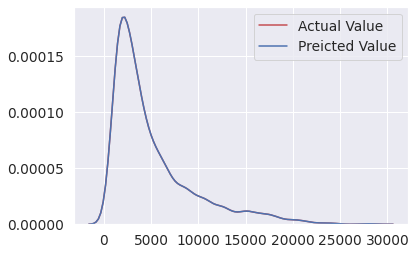

In [171]:
#ploting the model prediction with the y_test values the check the model prediction power
ax1 = sns.distplot(y_teste,hist=False,kde =True,color ="r",label ="Actual Value")
sns.distplot(pip_Lasso.predict(x_teste),color ="b",hist = False,kde =True, label = "Preicted Value",ax =ax1)